# Assignment 3: Finding The Minimal Energy Configuration Of Charge Particle Within A Circle


_Authors: Sai Vinay Vardhan Daliparthi (15073815), Boyan Mihaylov (15067602), Nitai Nijholt (12709018)_

In [185]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from typing import List, Tuple
from itertools import product, combinations
import matplotlib.patches as patches

Energy of between two patricles is given by:

$E_{i,j}=\dfrac{1}{|_{i,j}|}$


Force on 2 particles:


$\vec F_{i,j}=\frac{\vec r_{i,j}}{|r_{i,j}|^3}$


Source: Assignment 3 description

In [186]:
def get_force_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the electrostatic force between two particles.

    This function assumes that the particles follow Coulomb's Law,
    where the force magnitude is proportional to 1/distance^2.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        numpy.ndarray: The vector representing the force exerted on the first particle by the second.
    """

    # Convert positions to numpy arrays for vectorized operations
    p_i, p_j = np.array(p_i), np.array(p_j)

    # Calculate the displacement vector from particle j to i
    r_i_j = p_i - p_j

    # Compute the Euclidean distance between particles
    dist_i_j = np.linalg.norm(r_i_j)

    # Calculate the force vector using Coulomb's Law (considering force magnitude and direction)
    Force_i_j = coulomb_constant * r_i_j / (dist_i_j**3)

    return Force_i_j


def get_energy_2_particles(p_i, p_j, coulomb_constant=1):
    """
    Calculate the potential energy between two particles based on Coulomb's Law.

    The potential energy is inversely proportional to the distance between the particles.

    Args:
        p_i (tuple): Position (x, y) of the first particle.
        p_j (tuple): Position (x, y) of the second particle.
        coulomb_constant (float, optional): Coulomb's constant, default is 1 for normalized calculations.

    Returns:
        float: The scalar value of the potential energy between the two particles.
    """

    # Convert positions to numpy arrays for vectorized operations
    p_i, p_j = np.array(p_i), np.array(p_j)

    # Compute the Euclidean distance between particles
    dist_i_j = np.linalg.norm(p_i - p_j)

    # Calculate the potential energy using Coulomb's Law
    Energy_i_j = coulomb_constant / dist_i_j

    return Energy_i_j


The electrostatic potential energy $U_{\mathrm{E}}$ stored in a system of $N$ charges $q_1, q_2, \ldots, q_N$ at positions $\mathbf{r}_1, \mathbf{r}_2, \ldots, \mathbf{r}_N$ respectively, is:
$$
U_{\mathrm{E}}=\frac{1}{2} \sum_{i=1}^N q_i \Phi\left(\mathbf{r}i\right)=\frac{1}{2} k_e \sum{i=1}^N q_i \sum_{\substack{j=1 \\ j \neq i}}^N \frac{q_j}{r_{i j}}
$$


we assume $q{i} = q_{j} ... = q_{n}$

In [187]:

def get_energy_all_particles(list_of_particles):
    """
    Calculate the total potential energy of a system of particles.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        float: The total potential energy of the system.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize list to store energies
    energies = []

    # Calculate energy between each unique pair of particles
    for p_i, p_j in combinations(list_of_particles, 2):
        energy_of_combi = get_energy_2_particles(p_i, p_j)
        energies.append(energy_of_combi)
    
    # Convert list of energies to numpy array and sum them to get total energy
    total_energy = np.sum(np.array(energies))

    return total_energy

def get_total_force_all_particles(list_of_particles):
    """
    Calculate the total system force for a collection of particles.
    
    Args:
        list_of_particles (list or numpy.ndarray): A list of tuples or an n x 2 matrix representing the positions of n particles.

    Returns:
        numpy.ndarray: A 2-element vector representing the total force on the system.
    """

    # Convert list of tuples to numpy array if it isn't already
    if not isinstance(list_of_particles, np.ndarray):
        list_of_particles = np.array([list(row) for row in list_of_particles])

    # Initialize a 2D vector to store the total force
    total_force = np.zeros(2)  # Assuming 2D particles

    # Calculate force between each unique pair of particles and sum them
    for p_i, p_j in combinations(list_of_particles, 2):
        force_ij = get_force_2_particles(p_i, p_j)
        total_force += force_ij

    return total_force

In [188]:
p_i = (0,1)
p_j = (1,2)
force = get_force_2_particles(p_i,p_j)
print('force', force)

force [-0.35355339 -0.35355339]


In [189]:
def in_circle(position, radius):
    """Check if a position is within a circle of given radius centered at the origin."""
    position = np.array(position)
    x, y = position.T  # Transpose to separate x and y values
    return (x**2 + y**2) <= radius**2

In [190]:
# def randomly_generate_initial_positions(n_particles, radius):
#     pos if in_circle(np.random.uniform(1-,1 size=(2,n_particles))*2*radius)

#     return positions

    




In [191]:
def randomly_generate_initial_positions(n_particles, radius):
    positions = []
    while len(positions) < n_particles:
        x, y = np.random.uniform(-radius*2, radius*2, size=2)
        position = x,y
        if in_circle(position, radius):
            positions.append([x, y])
    return np.array(positions)

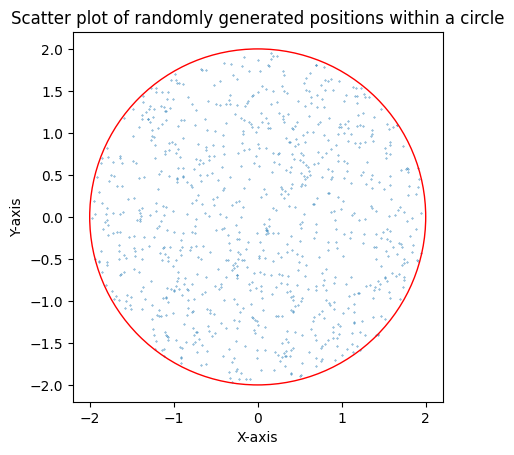

In [192]:
test_data = randomly_generate_initial_positions(900, 2)
x_coordinates = test_data[:, 0]  # Extract all x-coordinates
y_coordinates = test_data[:, 1]  # Extract all y-coordinates

# Create the figure and axis
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(x_coordinates, y_coordinates, s=0.1)

# Create a circle patch with the same radius as used for the position generation
circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
ax.add_patch(circle)

# Set aspect of the plot to be equal, so the circle isn't skewed
ax.set_aspect('equal', adjustable='box')

# Setting labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of randomly generated positions within a circle')

# Show the plot
plt.show()

In [193]:
def random_change_position_particles(particles, radius, movement_scaler=0.1):
    """Randomly increments x and y of each particle in a list."""
    updated_positions = []
    for particle in particles:
        delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius  # Use shape (2,) for delta_pos
        new_position = particle + delta_pos
        while not in_circle(new_position, radius):
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
            new_position = particle + delta_pos
        updated_positions.append(new_position)
    return np.array(updated_positions)

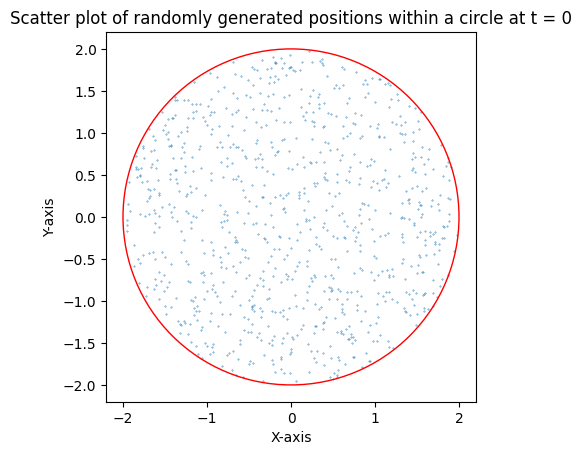

position particle 1 [ 0.37954764 -1.32911526]
Total System Energy 338806.1660100427
Total System Force [-136844.42842993  -42483.40796687]


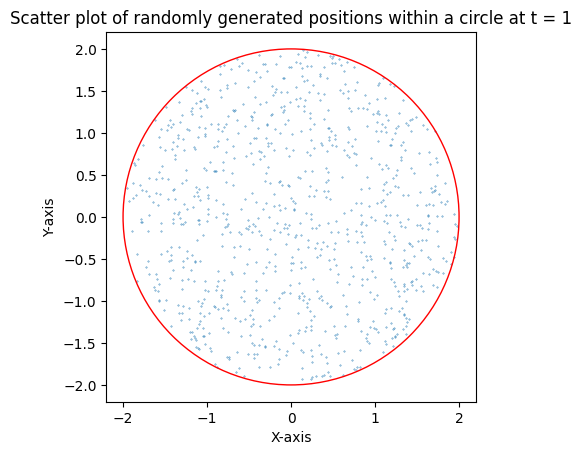

position particle 1 [0.68255556 1.06493839]
Total System Energy 340416.15049000597
Total System Force [-20484.96835817   7006.36787857]


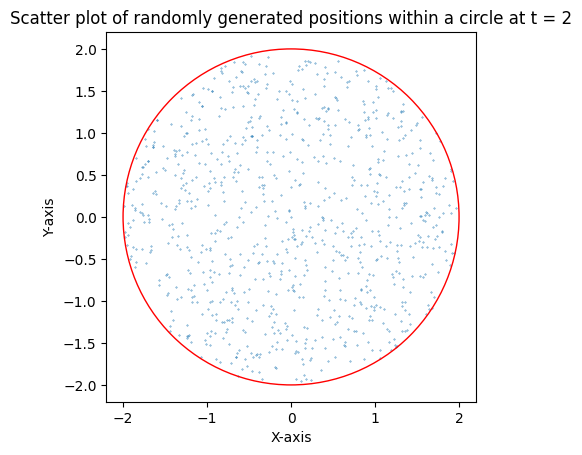

position particle 1 [-1.33482681  0.79522157]
Total System Energy 341997.1821564406
Total System Force [  2758.18150351 158422.04159163]


In [194]:
test_data = randomly_generate_initial_positions(900, 2)
radius = 2
timesteps = 3
movement_scaler = 2
for t in range(timesteps):
    x_coordinates = test_data[:, 0]  # Extract all x-coordinates
    y_coordinates = test_data[:, 1]  # Extract all y-coordinates

    # Create the figure and axis
    fig, ax = plt.subplots()

    # Scatter plot
    ax.scatter(x_coordinates, y_coordinates, s=0.1)

    # Create a circle patch with the same radius as used for the position generation
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='r', linestyle='-')
    ax.add_patch(circle)

    # Set aspect of the plot to be equal, so the circle isn't skewed
    ax.set_aspect('equal', adjustable='box')

    # Setting labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Scatter plot of randomly generated positions within a circle at t = {t}')

    # Show the plot
    plt.show()
    print('position particle 1', test_data[0])
    print('Total System Energy', get_energy_all_particles(test_data))
    print('Total System Force', get_total_force_all_particles(test_data))
    test_data = random_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler)

In [195]:
def cooling_func(t, a, b):
    """https://canvas.uva.nl/courses/39303/pages/lecture-09-the-gibbs-sampler-and-simulated-annealing?module_item_id=1830823 slide 14"""
    T_n = a/(np.log(t+b))
    return T_n

In [201]:
def Simulated_Anealing_change_position_particles(particles, time_range, radius, movement_scaler=0.1, T_init=1, cooling_function=None, a=10, b=2):
    if cooling_func is None:
        raise ValueError("cooling_func must be provided")

    T = T_init
    particles = np.array(particles)
    updated_positions = particles.copy()
    test_positions = particles.copy()
    Total_energy_old = get_energy_all_particles(particles)
    Total_Energy_over_time = np.zeros(time_range)

    
    for t in range(time_range):
        for index, particle in enumerate(particles):
            delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius  
            new_position = particle + delta_pos

            while not in_circle(new_position, radius):
                delta_pos = np.random.uniform(-1, 1, size=(2,)) * movement_scaler * radius
                new_position = particle + delta_pos
            
            test_positions[index] = new_position
            Total_energy_new = get_energy_all_particles(test_positions)
            
            if Total_energy_old > Total_energy_new:
                updated_positions[index] = new_position
                Total_energy_old = get_energy_all_particles(updated_positions)
            else:
                alpha = np.min([np.exp(-(Total_energy_new - Total_energy_old) / T), 1])
                if np.random.uniform() <= alpha:
                    updated_positions[index] = new_position
                    Total_energy_old = get_energy_all_particles(updated_positions)
                else: 
                    test_positions[index] = particles[index]
                    
            Total_Energy_over_time[t] = get_energy_all_particles(updated_positions)
        T = cooling_function(t, a, b)
    
    return updated_positions, Total_Energy_over_time

In [197]:
test_data = randomly_generate_initial_positions(40, 2)

In [198]:
test_data

array([[-0.16725043, -0.64843241],
       [-1.76490203, -0.38997606],
       [ 0.71560486, -0.61791858],
       [-0.17140382,  0.4840527 ],
       [ 1.86822014, -0.12477012],
       [ 1.34540717, -1.34753652],
       [ 1.88195725, -0.08808123],
       [ 1.5950167 , -0.8793283 ],
       [ 0.01604979,  1.59817392],
       [ 0.59262335,  1.29265015],
       [ 0.31742131,  1.03922368],
       [-1.22181047, -1.36142593],
       [ 0.70398741, -0.30757579],
       [-1.42274732,  0.09746765],
       [ 0.07972657, -1.60748058],
       [-0.90134061, -0.95163431],
       [ 0.7940593 , -1.65006374],
       [ 1.03029381,  0.8689273 ],
       [ 0.98791891, -0.61540213],
       [ 0.01799498, -0.59676563],
       [-1.05403051,  0.83208816],
       [ 1.47511992, -0.1387287 ],
       [-1.27102516,  1.53475988],
       [ 0.3026577 , -0.43649653],
       [-1.97458883, -0.31682102],
       [-1.0880055 ,  0.71601647],
       [-1.3377092 , -1.26593338],
       [-0.0037167 , -1.17478167],
       [ 0.27016693,

In [206]:
test_data = randomly_generate_initial_positions(40, 2)
energy_over_time_data = Simulated_Anealing_change_position_particles(particles=test_data, radius=radius, movement_scaler=movement_scaler, time_range=500,cooling_function=cooling_func, a = 60, b = 10)[1]

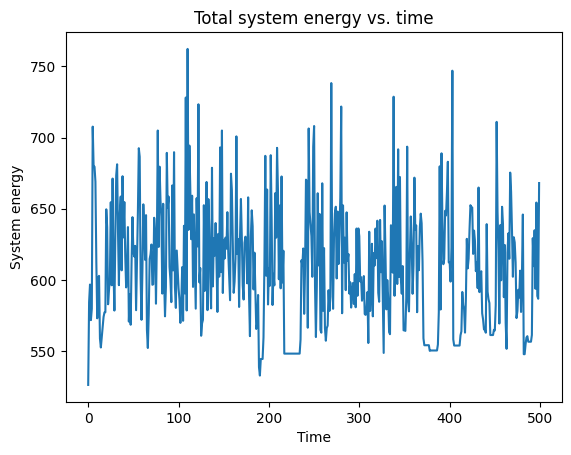

In [207]:
plt.plot(energy_over_time_data)
plt.title('Total system energy vs. time')
plt.xlabel('Time')
plt.ylabel('System energy')
plt.show()